In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# cross validation parameters:
k = 3
# M = [2,5,9,14,20,27,35,44]
D_ = [1,2,3,4,5,6,7,8]

In [2]:
# load data
def load_data():
    data = np.array(np.genfromtxt('2eggs_data.csv', delimiter=','))
    data = np.random.permutation(data)
    return data
data = load_data()

In [3]:
def train_test_split(data, D, k):
    
    extra = data.shape[0] % k
    data_k=np.split(data[extra:], k)
    

    data_test = data_k[D]
#     test_x = data_test[:,0]
#     test_y = data_test[:,1]
    test_x = data_test[:,:-1]
    test_y = data_test[:,-1:]
    test_l = data_test[:,]
    
    part=int((data.shape[0]-extra)/k)
    
    data_train = np.delete(data, range(D*part,(D+1)*part), axis=0)
    
    train_x = data_train[:,:-1]
    train_y = data_train[:,-1:]
                
    return train_x, train_y, test_x, test_y

In [4]:
def sign_np(x):
    x[x>=0] = 1
    x[x<0] =-1
    return x

def compare(x):
    x[x<0]=0
    return x

def polynomial_features(x, order):
    x = np.asarray(x).T[np.newaxis]
    n = x.shape[1]
    power_matrix = np.tile(np.arange(order + 1), (n, 1)).T[..., np.newaxis]
    X = np.power(x, power_matrix)
    I = np.indices((order + 1, ) * n).reshape((n, (order + 1) ** n)).T
    F = np.product(np.diagonal(X[I], 0, 1, 2), axis=2)
    return F

In [5]:
# plot mse's over all D tested 
def plot_mse(train_mses, test_mses, deg):
    plt.plot(np.arange(1,np.size(train_mses)+1),train_mses,'ro--', color = 'yellow', label = 'train_error')
    plt.plot(np.arange(1,np.size(test_mses)+1),test_mses,'ro--', color = 'blue', label = 'test_error')
    plt.title('Error on entire dataset in D', fontsize=18)
    plt.xlabel('degree D', fontsize=18)
    plt.ylabel('Error       ', fontsize=18)
    plt.legend()

In [6]:
# run over all the degrees, fit each models, and calculate errors
def try_all_degs(data, deg_range, k):
    # generate nonlinear features
    train_mses, test_mses = [], []
    for D in np.arange(0,np.size(deg_range)):
        train_MSE = 0
        test_MSE = 0
        for i in range(k):

            train_x, train_y, test_x, test_y = train_test_split(data, i, k)

            F = polynomial_features(train_x, D_[D])
            w = np.dot(np.linalg.pinv(np.dot(F, F.T)), np.dot(F,train_y))            

            train_MSE += np.mean(compare(sign_np(-train_y*np.dot(F.T,w))))
    
            F = polynomial_features(test_x, D_[D])
            test_MSE += np.mean(compare(sign_np(-test_y*np.dot(F.T,w))))

        train_mses.append(train_MSE)
        test_mses.append(test_MSE)

    fig = plt.figure(figsize = (7,7))
    plot_mse(train_mses, test_mses,deg_range)
    plt.show()

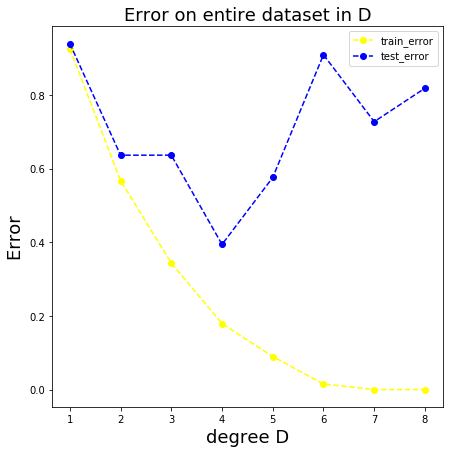

In [7]:
plt.clf()
try_all_degs(data, D_, k)